# Assignment 4
Raghav Juyal \
EP20BTECH11018

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy import optimize as opt
from statsmodels.tools import eval_measures as em

# Question 1
Download the data corresponding to x, y, and σy from http://www.iith.ac.in/~shantanud/testdata.dat. \
Find the best-fit values after fitting the data to linear, quadratic, and cubic polynomials. Find out \
which model fits the data best from frequentist model comparison as well as using AIC and BIC. For \
frequentist model comparison, using the linear model as the null hypothesis, find out the p value \
corresponding to the preferred model. (or if the linear model is the prefered model, then compare it to \
the quadratic model). Also show a plot overlaying the data with best fit solutions from linear, quadratic \
and cubic functions with different line styles for each of the fits.

In [3]:
testdata = np.loadtxt('testdata.dat')

def linear(x, a, b):
    return a*x + b

def quadratic(x, a, b, c):
    return a*x**2 + b*x + c

def cubic(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d


linearfit_param = curve_fit(linear, xdata = testdata[:,0], ydata = testdata[:,1], sigma=testdata[:,2])
quadraticfit_param = curve_fit(quadratic, testdata[:,0], testdata[:,1], sigma=testdata[:,2])
cubicfit_param = curve_fit(cubic, testdata[:,0], testdata[:,1], sigma=testdata[:,2])

print('Linear fit values: ', linearfit_param[0])
print('Quadratic fit values: ', quadraticfit_param[0])
print('Cubic fit values: ', cubicfit_param[0])

Linear fit values:  [ 2.79789861 -1.11028082]
Quadratic fit values:  [ 0.50261293  2.38475187 -1.05578915]
Cubic fit values:  [-0.96724992  1.74451332  1.97184055 -1.02910462]


Frequentist Comparision

In [4]:
chi2_linear = np.sum(((testdata[:,1] - linear(testdata[:,0], *linearfit_param[0]))/testdata[:,2])**2)
chi2_quadratic = np.sum(((testdata[:,1] - quadratic(testdata[:,0], *quadraticfit_param[0]))/testdata[:,2])**2)
chi2_cubic = np.sum(((testdata[:,1] - cubic(testdata[:,0], *cubicfit_param[0]))/testdata[:,2])**2)


def chi2_gof(x, y, yerr, fit_func, *fit_func_args):
    return np.sum(((y - fit_func(x, *fit_func_args))/yerr)**2)


#Linear fit is considered NULL hypothesis
delta_chi2_quadratic = chi2_linear - chi2_quadratic
delta_chi2_cubic = chi2_linear - chi2_cubic

p_quadratic = 1 - st.chi2.cdf(delta_chi2_quadratic, 1)
p_cubic = 1 - st.chi2.cdf(delta_chi2_cubic, 2)

print('p-value for quadratic fit: ', p_quadratic)
print('p-value for cubic fit: ', p_cubic)

p-value for quadratic fit:  0.17813275695316744
p-value for cubic fit:  0.32887884419522884


Since the p-value of quadratic fit is less than that of cubic fit, cubic fit may be a better fit.

Maximum Likelihood Estimation

In [5]:
def likelihood_estimator(func, data, *args):
    return np.product(np.exp(-0.5 * (((data[:,1] - func(data[:,0], *args))/data[:,2]) ** 2) ))

def max_likelihood(func, data, args):
    return opt.minimize(lambda x: -likelihood_estimator(func, data, *x), args, method='Nelder-Mead').x


maxlkl = [likelihood_estimator(linear,testdata, *max_likelihood(linear, testdata, linearfit_param[0])),
likelihood_estimator(quadratic, testdata, *max_likelihood(quadratic, testdata, quadraticfit_param[0])),
likelihood_estimator(cubic, testdata, *max_likelihood(cubic, testdata, cubicfit_param[0]))]

#Calculate AIC and BIC
bic = -2 * np.log(maxlkl) + np.log(len(testdata)) * np.array([2, 3, 4])

aic = -2 * np.log(maxlkl) + 2 * np.array([2, 3, 4])

aic_c = aic + 2 * np.array([2, 3, 4]) * np.array([3, 4, 5]) / (len(testdata) - np.array([2, 3, 4]) - 1)

#Linear fit is considered as NULL hypothesis
delta_aic = aic - aic[0]

delta_bic = bic - bic[0]

print("For linear fit")
print('AIC: ', aic[0])
print('BIC: ', bic[0])
print()
print("For quadratic fit")
print('AIC: ', aic[1])
print('BIC: ', bic[1])
print()
print("For cubic fit")
print('AIC: ', aic[2])
print('BIC: ', bic[2])


print('\nLinear fit is considered as NULL hypothesis\n')
print("For quadratic fit")
print('Delta AIC: ', delta_aic[1])
print('Delta BIC: ', delta_bic[1])
print()
print("For cubic fit")
print('Delta AIC: ', delta_aic[2])
print('Delta BIC: ', delta_bic[2])

For linear fit
AIC:  15.309175575502223
BIC:  17.300640122610204

For quadratic fit
AIC:  15.496041767569295
BIC:  18.483238588231266

For cubic fit
AIC:  17.085043873972353
BIC:  21.067972968188315

Linear fit is considered as NULL hypothesis

For quadratic fit
Delta AIC:  0.18686619206707178
Delta BIC:  1.1825984656210622

For cubic fit
Delta AIC:  1.7758682984701295
Delta BIC:  3.7673328455781103


delta AIC is in range 0-2 for quadratic and cubic fit so supports both models \
delta BIC is < 2 for quadratic and > 2 for cubic(positive evidence against cubic)\
Therefore, quadratic model is preferred 

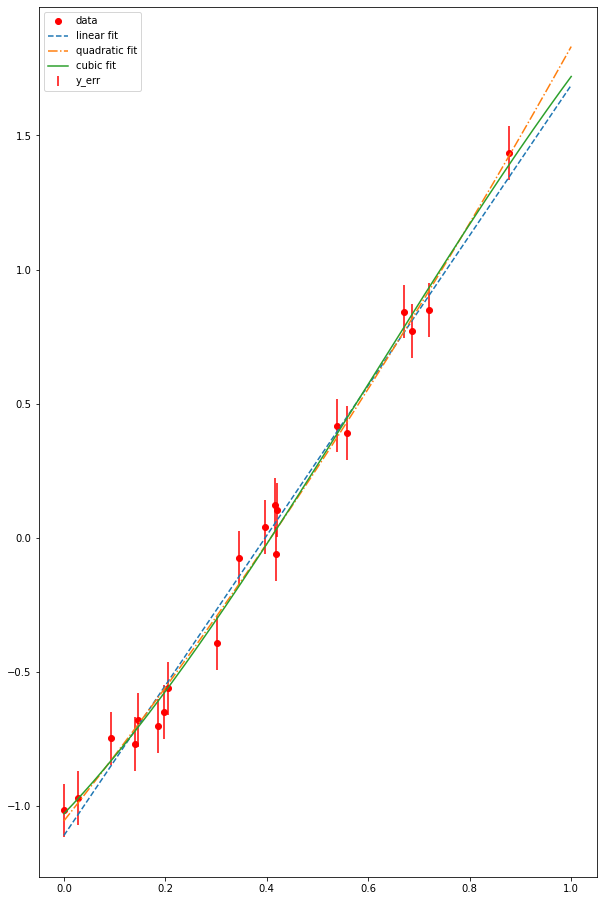

In [7]:
#Plotting the data and the fits

trange = np.linspace(0, 1, 1000)
plt.figure(figsize=(10,16))
plt.scatter(testdata[:,0], testdata[:,1], label='data', c='r')
plt.errorbar(testdata[:,0], testdata[:,1], yerr=testdata[:,2], fmt='none', label='y_err', c='r')
plt.plot(trange, linear(trange, *linearfit_param[0]), label='linear fit', ls = '--')
plt.plot(trange, quadratic(trange, *quadraticfit_param[0]), label='quadratic fit', ls = '-.')
plt.plot(trange, cubic(trange, *cubicfit_param[0]), label='cubic fit')
plt.legend()
plt.show()

# Question 2
For the model comparison problem shown in class on JVDP’s blog, calculate AIC \
and BIC for the linear and quadratic models. Do these results agree with the \
frequentist model comparison results shown on the blog? Also mention the \
qualitative significance using strengt of evidence rules.

In [8]:
data = np.array([[ 0.42,  0.72,  1e-7  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39, 
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])

x, y, sigma_y = data
linearfit_param = curve_fit(linear, xdata = x, ydata = y, sigma=sigma_y)
quadraticfit_param = curve_fit(quadratic, xdata = x, ydata = y, sigma=sigma_y)


maxlkl = [likelihood_estimator(linear, data.transpose(), *max_likelihood(linear, data.transpose(), linearfit_param[0])),
likelihood_estimator(quadratic, data.transpose(), *max_likelihood(quadratic, data.transpose(), quadraticfit_param[0]))]

In [9]:
bic = -2 * np.log(maxlkl) + np.log(len(x)) * np.array([2, 3])

aic = -2 * np.log(maxlkl) + 2 * np.array([2, 3])

aic_c = aic + 2 * np.array([2, 3]) * np.array([3, 4]) / (len(testdata) - np.array([2, 3]) - 1)

#Linear fit is considered as NULL hypothesis
delta_aic = aic - aic[0]

delta_bic = bic - bic[0]
print("For linear fit")
print('AIC: ', aic[0])
print('BIC: ', bic[0])
print()
print("For quadratic fit")
print('AIC: ', aic[1])
print('BIC: ', bic[1])
print()

For linear fit
AIC:  15.324128704090546
BIC:  17.31559325119853

For quadratic fit
AIC:  15.46283414153923
BIC:  18.450030962201204



Taking the linear fit as null hypothesis we see that there is negligible difference in \
the AIC of both models and the BIC of linear fit is slightly lesser that that of quadratic fit. \
This implies there is only slight evidence against the quadratic model which is in agreement with \
the results shown in the blog.

# Question 3
Find out one paper in research literature which uses the Kolmogorov-Smirnov test \
and explain briefly how it was used in that paper. Is K-S test used incorrectly \
(in this paper) as per the warnings on the Penn State website discussed in class?

PAPER: EWF : simulating exact paths of the Wright--Fisher diffusion(https://arxiv.org/abs/2301.05459)

Here the output was validated by generating 10,000 samples for a wide variety of cases and subsequently \
comparing this to a truncation of the transition density by means of Kolmogorov–Smirnov test \
as well as QQ-plots. They point out that they present only neutral output here as the non-neutral \
output is generated using the same rejection procedure as used in Jenkins and Span`o.


# Question 4
Calculate the significance in terms of no of sigmas of the Higgs boson discovery claim \
from the p value given in the abstract of the ATLAS discovery paper, arXiv:1207.7214.

Do the same for the LIGO discovery of GW150914, for which the pvalue = 2 × 10−7. (Hint : look up norm.isf)

From the Super-K discovery paper for neutrino oscillations (hep-ex/9807003), calculate the $\chi^2$ GOF using the best-fit \
$\nu_{\mu} \leftrightarrow \nu_{\tau}$ oscillation solution. (Hint : check page 4 of the paper, second column,last paragraph)

In [10]:
print(f'Significance of Higgs Boson discovery claim with p value of 1.7e-9 is: {st.norm.isf(1.7e-9)}')
print(f'Significance of LIGO discovery of GW150914 with p value of 2e-7 is := {st.norm.isf(2e-7)}')
print(f'chi2 GOF of Super-K discovery of neutrino oscillations = {st.chi2(67).sf(65.2)}')

Significance of Higgs Boson discovery claim with p value of 1.7e-9 is: 5.911017938341624
Significance of LIGO discovery of GW150914 with p value of 2e-7 is := 5.068957749717791
chi2 GOF of Super-K discovery of neutrino oscillations = 0.5394901931099036
